In [293]:
from scipy.stats import kruskal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [294]:
data = pd.read_json('../data_deliverable/data/preprocessed_items.json')

In [295]:
def compare_price_by_location(data):
    """
    Performs a Kruskal-Wallis H-test to compare price distributions by location.
    
    Parameters:
    data (DataFrame): A pandas DataFrame with 'price' and 'location' columns.
    
    Returns:
    stat (float) and p_value (float)
    """
    #extract the first word from the 'location' string
    data['location'] = data['location'].str.extract(r'(\b\w+\b)', expand=False).str.lower()
    groups = data.groupby('location')['price'].apply(list)
    # for location, prices in groups.items():
    #     print(f"Location: {location}, Prices: {prices}")
    
    # Perform the Kruskal-Wallis H-test
    stat, p_value = kruskal(*groups)
    print('Kruskal-Wallis H-test result: Stat=%.3f, p=%.3f' % (stat, p_value))
    
    #Return the test statistic and p-value
    return stat, p_value


In [296]:
compare_price_by_location(data)

Kruskal-Wallis H-test result: Stat=914.337, p=0.000


(914.3372139402047, 2.2368559320322443e-106)

In [297]:
def compare_price_by_category(data):
    """
    Performs a Kruskal-Wallis H-test to compare price distributions by category.
    
    Parameters:
    data (DataFrame): A pandas DataFrame with 'price' and 'location' columns.
    
    Returns:
    stat (float) and p_value (float)
    """
    groups = data.groupby('category')['price'].apply(list)
    print(len(groups))
    for category, prices in groups.items():
        print(f"Location: {category}, Prices: {prices}")
    
    # Perform the Kruskal-Wallis H-test
    stat, p_value = kruskal(*groups)
    print('Kruskal-Wallis H-test result: Stat=%.3f, p=%.3f' % (stat, p_value))
    
    #Return the test statistic and p-value
    return stat, p_value

In [298]:
compare_price_by_category(data)

59
Location: app, Prices: [350, 260, 40, 30, 30, 575, 30, 575, 15, 20, 300, 480, 250, 250, 525, 280, 20, 350, 40, 100, 500, 200, 600, 250, 175, 700, 150, 400, 400, 100, 150, 675, 60, 1200, 95, 300, 175, 100, 40, 30, 30, 30, 30, 50, 30, 50, 20, 850, 50, 30, 50, 150, 30, 30, 30, 60, 40, 60, 40, 40, 150, 30, 60, 40, 60, 20, 30, 150, 20, 250, 250, 450, 100, 375, 60, 500, 250, 50, 50, 100, 60]
Location: art, Prices: [125, 100, 100, 175, 125, 500, 50, 50, 1800, 95, 45, 95, 60, 125, 25, 50, 50, 100, 20, 3000, 100]
Location: atq, Prices: [60, 50, 15, 20, 30, 30, 150, 20, 25, 100, 100, 50, 150, 50, 65, 85, 65, 20, 25, 100, 100, 50, 150, 50, 65, 85, 65, 100, 350, 50, 45, 65, 20, 80, 3, 350, 60, 65, 20, 45, 45, 50, 70, 60, 2, 200, 100, 140, 160, 625, 80, 35, 135, 45, 100, 40, 100, 50, 400, 300, 200, 250, 400, 200, 450, 500, 590, 20, 60, 199, 50, 45, 350, 90, 350, 60, 75, 100, 25, 200, 40, 15, 75, 30, 180, 150, 120, 10, 150, 50, 20, 45, 25, 18, 100, 25, 569, 25, 900]
Location: avo, Prices: [2000]


(1163.7007398199833, 1.8094659679910423e-205)

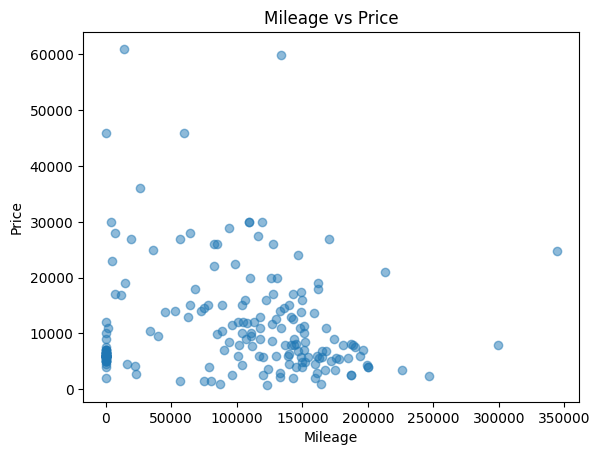

In [299]:
plt.scatter(data['mileage'], data['price'], alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [300]:
#filtering out mileages that are none
filtered_data = data[data['mileage'].notna()]
print(len(filtered_data))


200


In [301]:
def linear_regression(data):
    X= data['mileage']
    y = data['price']
    
    
    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
    model = LinearRegression()
 
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)         
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print("Mean Squared Error on Training Set:", train_mse)
    print("Mean Squared Error on Testing Set:", test_mse)   
   
    score = model.score(X_test, y_test)
    print("The correlation coefficient on Test set:", score)
    
    plt.scatter(X_test, y_test, color ='blue', alpha=0.5)
    plt.plot(X_test,y_test_pred, color ='black')
    plt.title('Mileage vs Price')
    plt.xlabel('Mileage')
    plt.ylabel('Price')
    
    plt.show()
    return train_mse, test_mse, score

Mean Squared Error on Training Set: 95331872.74546011
Mean Squared Error on Testing Set: 69618662.26786885
The correlation coefficient on Test set: 0.0022693253035702687


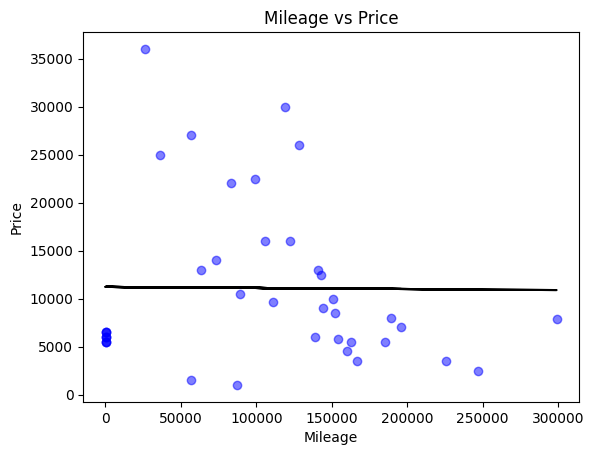

(95331872.74546011, 69618662.26786885, 0.0022693253035702687)

In [302]:
linear_regression(filtered_data)

